In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

df_red['color'] = np.repeat('red', len(df_red))
df_white['color'] = np.repeat('white', len(df_white))

df = df_red.append(df_white)

#standardise column names
df.columns = [c.lower().replace(' ', '_') for c in df]
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


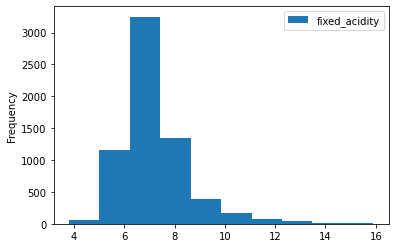

In [2]:
df.plot.hist(y='fixed_acidity');

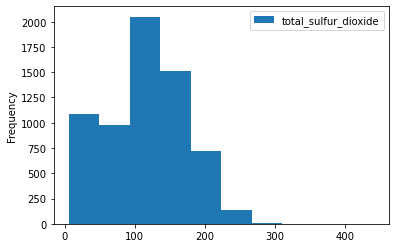

In [3]:
df.plot.hist(y='total_sulfur_dioxide');

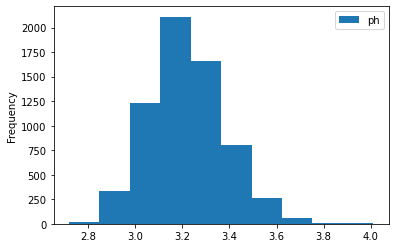

In [4]:
df.plot.hist(y='ph');

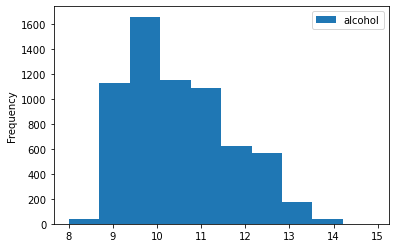

In [5]:
df.plot.hist(y='alcohol');

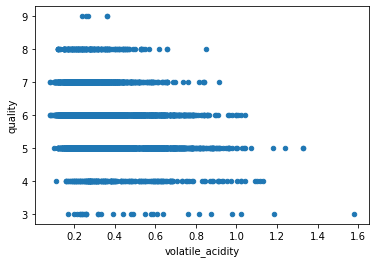

In [6]:
df.plot.scatter(x='volatile_acidity', y='quality');

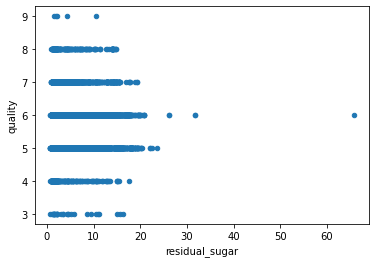

In [7]:
df.plot.scatter(x='residual_sugar', y='quality');

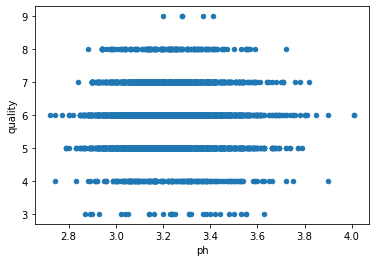

In [8]:
df.plot.scatter(x='ph', y='quality');

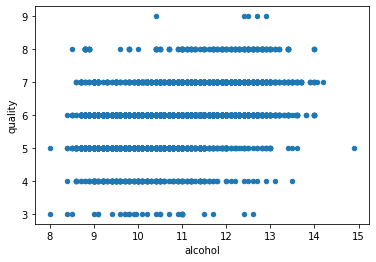

In [9]:
df.plot.scatter(x='alcohol', y='quality');

## Group by
### Q1: Is a certain type of wine (red or white) associated with higher quality?

In [10]:
df.groupby('color').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
color,,,,,,,,,,,,
red,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
white,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909


### Q2: What level of acidity (pH value) receives the highest average rating?

In [57]:
bin_edges = [2.740000, 3.110000, 3.210000, 3.320000, 4.010000]
bin_names = ['High', 'Moderately High', 'Medium', 'Low']

ph_bins = pd.cut(df['ph'], bins=bin_edges, labels=bin_names)
df = df.assign(ph_bins = ph_bins)
means = df.groupby('ph_bins').mean()
means

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
ph_bins,,,,,,,,,,,,
High,7.541691,0.294583,0.370379,7.094461,0.054820,33.193586,129.974344,0.994707,3.029399,0.503085,10.330476,5.784257
Moderately High,7.365064,0.318551,0.340548,5.931984,0.054666,33.229154,126.815886,0.994697,3.164833,0.509300,10.391073,5.784540
Medium,7.143566,0.346751,0.313585,4.721159,0.055715,28.983995,111.182138,0.994476,3.267010,0.541287,10.610369,5.850832
Low,6.769949,0.403815,0.243901,3.848983,0.058777,26.327510,93.244917,0.994899,3.433348,0.574136,10.656057,5.859593


Text(0, 0.5, 'Average Quality Rating')

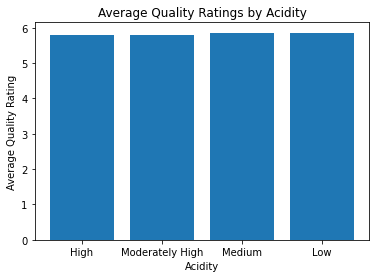

In [58]:
plt.bar(means['quality'].keys().array, means['quality'].values)#
plt.title('Average Quality Ratings by Acidity')
plt.xlabel('Acidity')
plt.ylabel('Average Quality Rating')

Text(0, 0.5, 'Average Quality Rating')

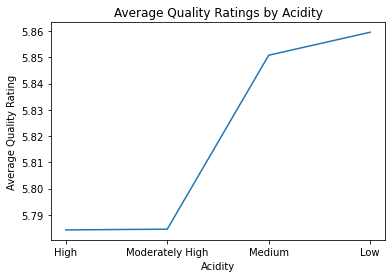

In [59]:
plt.plot(means['quality'].keys().array, means['quality'].values)
plt.title('Average Quality Ratings by Acidity')
plt.xlabel('Acidity')
plt.ylabel('Average Quality Rating')


## Query
### Q1: Do wines with higher alcoholic content receive better ratings?

In [13]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [14]:
def low_high_means_quality(feature):
    median = df[feature].median()
    low = df.query('{} < {}'.format(feature, median))
    high = df.query('{} >= {}'.format(feature, median))
    return low['quality'].mean(), high['quality'].mean()
    
mean_quality_low, mean_quality_high = low_high_means_quality('alcohol')
[mean_quality_low, mean_quality_high]

[5.475920679886686, 6.146084337349397]

Text(0, 0.5, 'Average Quality Rating')

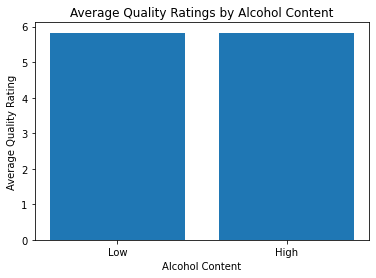

In [17]:
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(labels, heights)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating')

### Q2: Do sweeter wines (more residual sugar) receive better ratings?

In [16]:
mean_quality_low, mean_quality_high = low_high_means_quality('residual_sugar')
[mean_quality_low, mean_quality_high]

[5.808800743724822, 5.82782874617737]

Text(0, 0.5, 'Average Quality Rating')

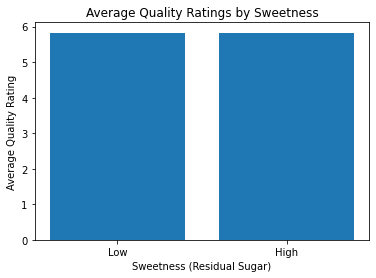

In [18]:
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(labels, heights)
plt.title('Average Quality Ratings by Sweetness')
plt.xlabel('Sweetness (Residual Sugar)')
plt.ylabel('Average Quality Rating')

In [62]:
color_counts = df.groupby(['color', 'quality']).count()['ph']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: ph, dtype: int64

In [64]:
color_totals = df.groupby('color').count()['ph']
color_totals

color
red      1599
white    4898
Name: ph, dtype: int64

In [73]:
red_proportions = color_counts['red'] / color_totals['red']
red_proportions['9'] = 0
red_proportions


quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: ph, dtype: float64

In [70]:
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: ph, dtype: float64

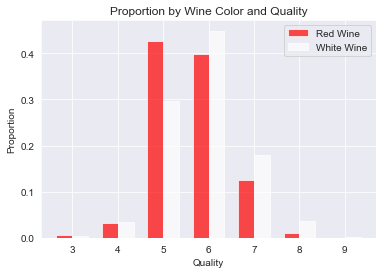

In [75]:
import seaborn as sns
sns.set_style('darkgrid')

ind = np.arange(len(red_proportions))
width = 0.35

red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2
labels = ['3', '4', '5', '6', '7', '8', '9']
plt.xticks(locations, labels)

plt.legend()